<a href="https://colab.research.google.com/github/DuplamenteH/Machine-Learning/blob/master/Projeto1_NS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Carregando dados e ajustando os DataFrames

In [1]:
import pandas as pd 
uri = 'https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv'
filmes = pd.read_csv(uri)
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [2]:
renomear = {
    'movieId': 'filmesId',
    'title'  : 'titulo',
    'genres' : 'genero'
}

filmes = filmes.rename(columns=renomear)
filmes.head()

,filmesId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
generos = filmes.genero.str.get_dummies(sep='|')

In [4]:
generos.head()


,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
dados_filmes = pd.concat([filmes,generos],axis=1)
dados_filmes.head()

,filmesId,titulo,genero,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#Escalonando dados

In [0]:
from sklearn.preprocessing import  StandardScaler 
scaler = StandardScaler()

In [7]:
generos_Escalados = scaler.fit_transform(generos)

generos_Escalados.shape

(9742, 20)

#Agrupando os dados

In [0]:
from sklearn.cluster import KMeans as KM
modelo = KM(n_clusters=3) 

In [9]:
modelo.fit(generos_Escalados)
print('Grupos {}'.format(modelo.labels_))

Grupos [0 0 2 ... 1 0 2]


In [10]:
print(generos.columns)

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')


In [11]:
print(modelo.cluster_centers_)

[[-0.05917995  0.07800802  1.07836047  2.62653726  2.20147791  0.09690805
  -0.29341328 -0.20631678 -0.62728473  1.0524643  -0.08259444 -0.26070964
   0.4134677   0.44276241 -0.12178994 -0.25457042  0.20551609 -0.44142559
  -0.16615871 -0.09631557]
 [ 0.04490582  0.12376766 -0.04681388 -0.25346679 -0.25182559 -0.76541974
   0.10896657  0.12851791  0.29425868 -0.09712303  0.06819163  0.14895043
   0.00595447 -0.0832468   0.13060606 -0.1241101   0.09171323  0.30890108
   0.09655442  0.04179445]
 [-0.05917995 -0.22531935 -0.20061199 -0.25744465 -0.15049746  1.24397641
  -0.10495169 -0.15983707 -0.32600402 -0.11052373 -0.0917441  -0.17967816
  -0.11654922  0.02377816 -0.18510746  0.27144134 -0.20507466 -0.39823234
  -0.11720627 -0.04444042]]


In [12]:
grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos.columns)
grupos

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.059180,0.078008,1.078360,2.626537,2.201478,0.096908,-0.293413,-0.206317,-0.627285,1.052464,-0.082594,-0.260710,0.413468,0.442762,-0.121790,-0.254570,0.205516,-0.441426,-0.166159,-0.096316
1,0.044906,0.123768,-0.046814,-0.253467,-0.251826,-0.765420,0.108967,0.128518,0.294259,-0.097123,0.068192,0.148950,0.005954,-0.083247,0.130606,-0.124110,0.091713,0.308901,0.096554,0.041794
2,-0.059180,-0.225319,-0.200612,-0.257445,-0.150497,1.243976,-0.104952,-0.159837,-0.326004,-0.110524,-0.091744,-0.179678,-0.116549,0.023778,-0.185107,0.271441,-0.205075,-0.398232,-0.117206,-0.044440


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd484650be0>,
      dtype=object)

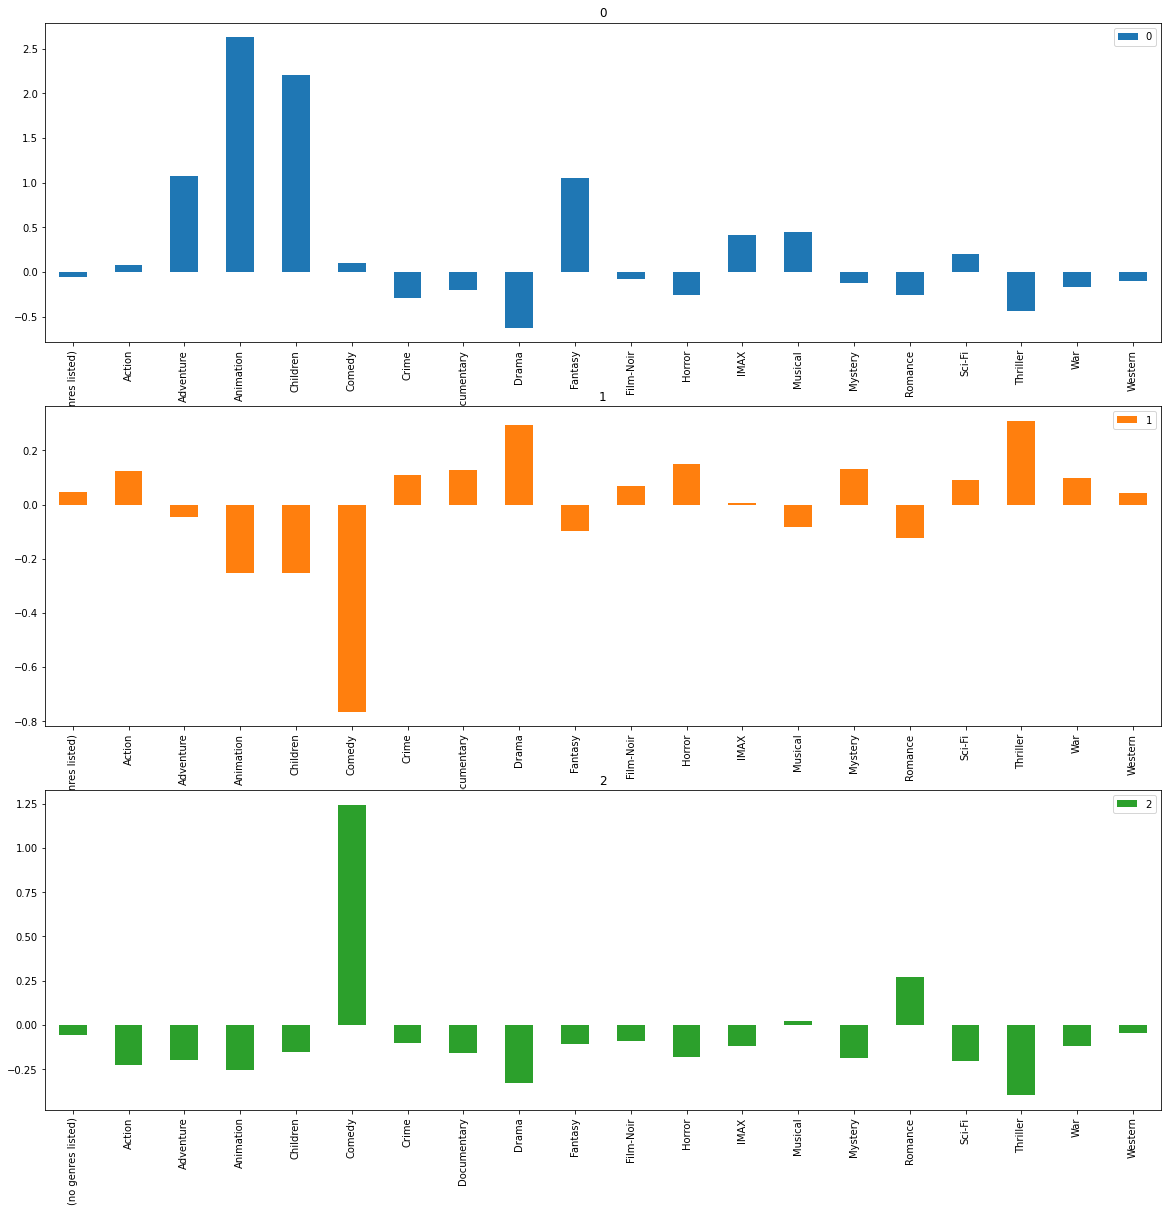

In [13]:
grupos.transpose().plot.bar(subplots=True,
                            figsize=(20,20),
                            sharex=False)

In [14]:
grupo = 0

filtro = modelo.labels_ == grupo

dados_filmes[filtro].sample(10)

,filmesId,titulo,genero,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
9129,146662,Dragons: Gift of the Night Fury (2011),Adventure|Animation|Comedy,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7822,92730,Rollo and the Woods Sprite (Rölli ja metsänhen...,Children|Fantasy,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
7834,93208,Mickey's The Prince and the Pauper (1990),Animation|Children,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8273,105468,Cloudy with a Chance of Meatballs 2 (2013),Animation|Children|Comedy|Fantasy,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
7195,72603,Merry Madagascar (2009),Animation,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6347,49274,Happy Feet (2006),Adventure|Animation|Children|Comedy|IMAX,0,0,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5766,31193,"Many Adventures of Winnie the Pooh, The (1977)",Animation|Children|Musical,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7547,85179,Summer Wars (Samâ wôzu) (2009),Adventure|Animation|Comedy|Sci-Fi,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7918,95313,Jack-Jack Attack (2005),Adventure|Animation|Children|Comedy,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8972,137859,Dragon Ball Z Gaiden: The Plot to Destroy the ...,Action|Adventure|Animation,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
from sklearn.manifold import TSNE
tsne = TSNE()
visualizacao = tsne.fit_transform(generos_Escalados)

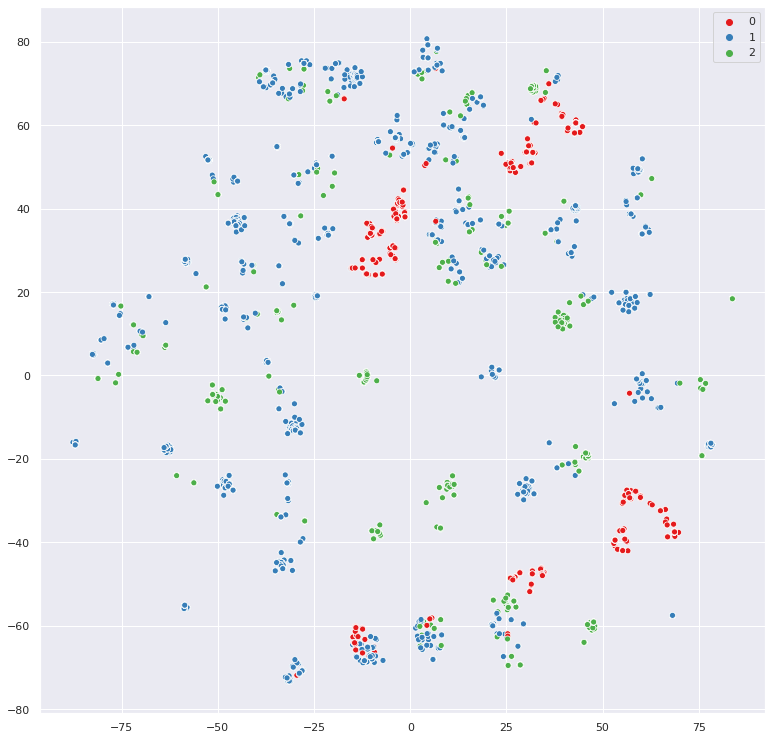

In [21]:
import seaborn as sns

sns.set(rc={'figure.figsize': (13, 13)})
sns.scatterplot(x=visualizacao[:, 0],
               y=visualizacao[:, 1],
               hue=modelo.labels_,
               palette=sns.color_palette('Set1', 3))

#Descobrindo o melhor numero de grupos

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd4810b95c0>,
      dtype=object)

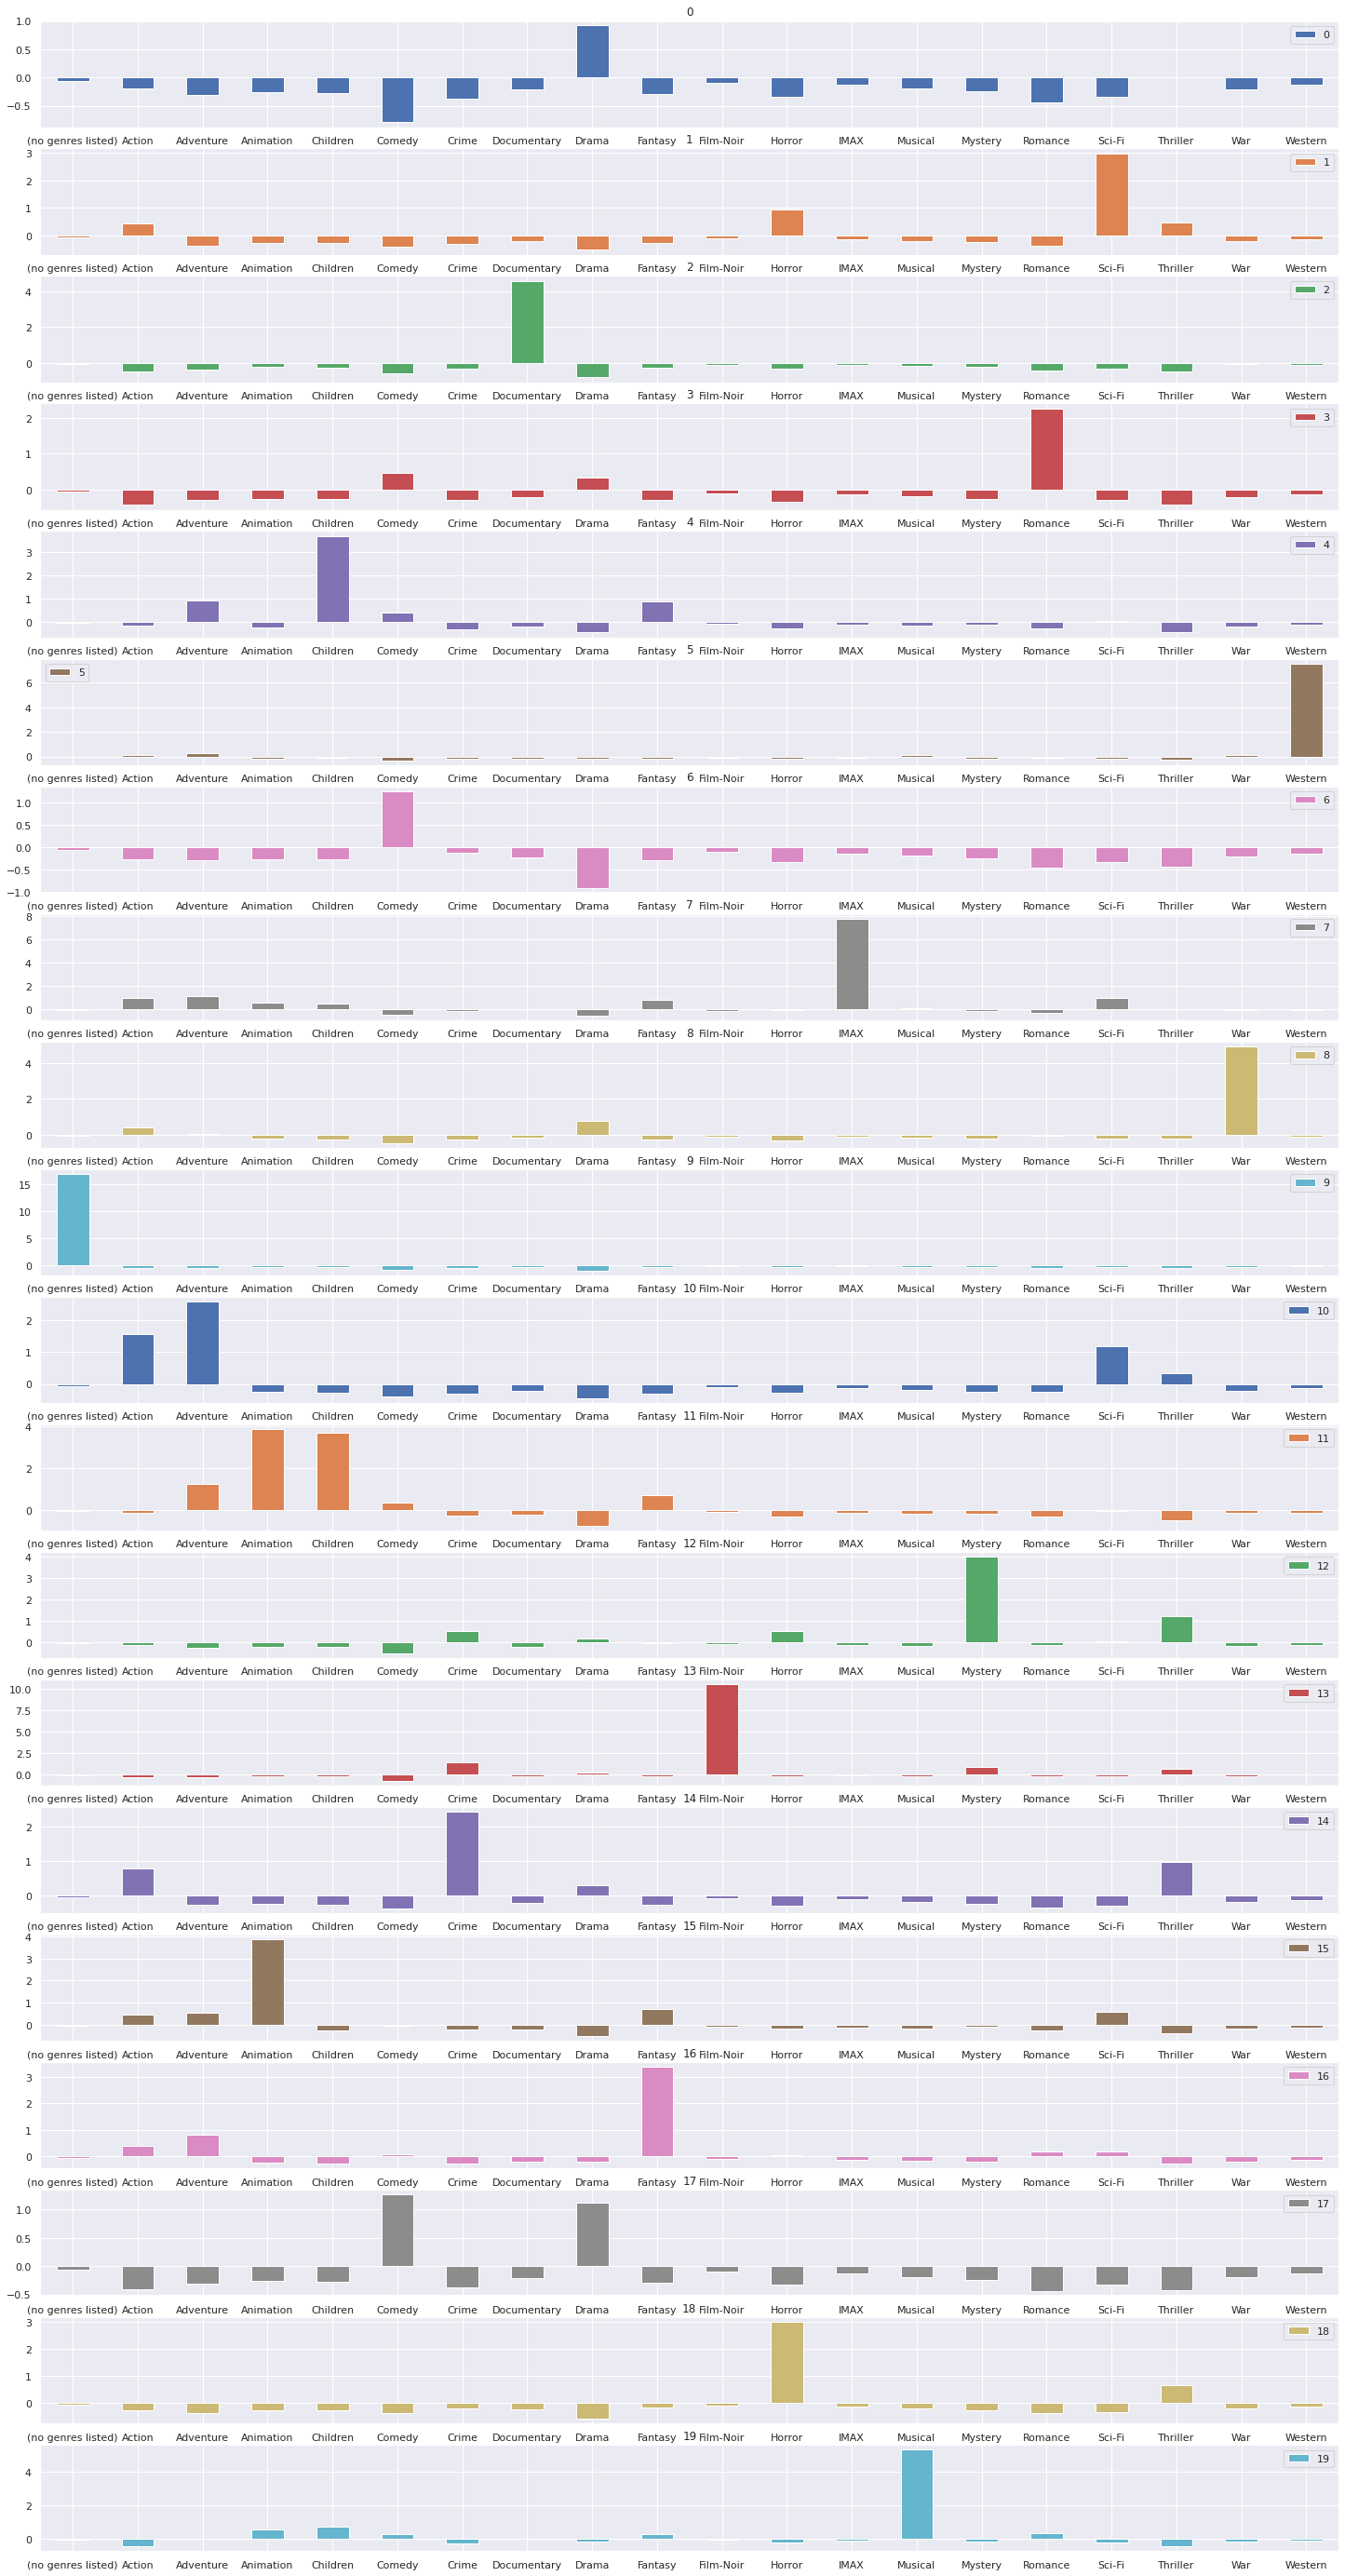

In [23]:
modelo = KM(n_clusters=20)
modelo.fit(generos_Escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)
grupos.transpose().plot.bar(subplots=True,
               figsize=(25, 50),
               sharex=False,
               rot=0)



In [26]:
grupo = 11

filtro = modelo.labels_ == grupo

dados_filmes[filtro].sample(10)

,filmesId,titulo,genero,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
12,13,Balto (1995),Adventure|Animation|Children,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9379,163072,Winnie Pooh (1969),Animation|Children,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3872,5444,Lilo & Stitch (2002),Adventure|Animation|Children|Sci-Fi,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4626,6889,Brother Bear (2003),Adventure|Animation|Children,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4424,6536,Sinbad: Legend of the Seven Seas (2003),Adventure|Animation|Children|Fantasy,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4647,6946,Looney Tunes: Back in Action (2003),Action|Animation|Children|Fantasy,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1757,2355,"Bug's Life, A (1998)",Adventure|Animation|Children|Comedy,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1756,2354,"Rugrats Movie, The (1998)",Animation|Children|Comedy,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2978,3990,Rugrats in Paris: The Movie (2000),Animation|Children|Comedy,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [0]:
def kmeans(numero_de_clusters, generos):
  modelo = KM(n_clusters=numero_de_clusters)
  modelo.fit(generos)
  return [numero_de_clusters, modelo.inertia_]

In [0]:
resultado = [kmeans(numero_de_grupos, generos_Escalados) for numero_de_grupos in range(1, 41)]

In [0]:
resultado = pd.DataFrame(resultado, 
            columns=['grupos', 'inertia'])

In [33]:
resultado

,grupos,inertia
0,1,194840.000000
1,2,179528.169277
2,3,168086.313979
3,4,157410.507935
4,5,147751.475580
5,6,137902.753727
6,7,128723.526444
7,8,120554.192381
8,9,110643.681805
9,10,104362.593184


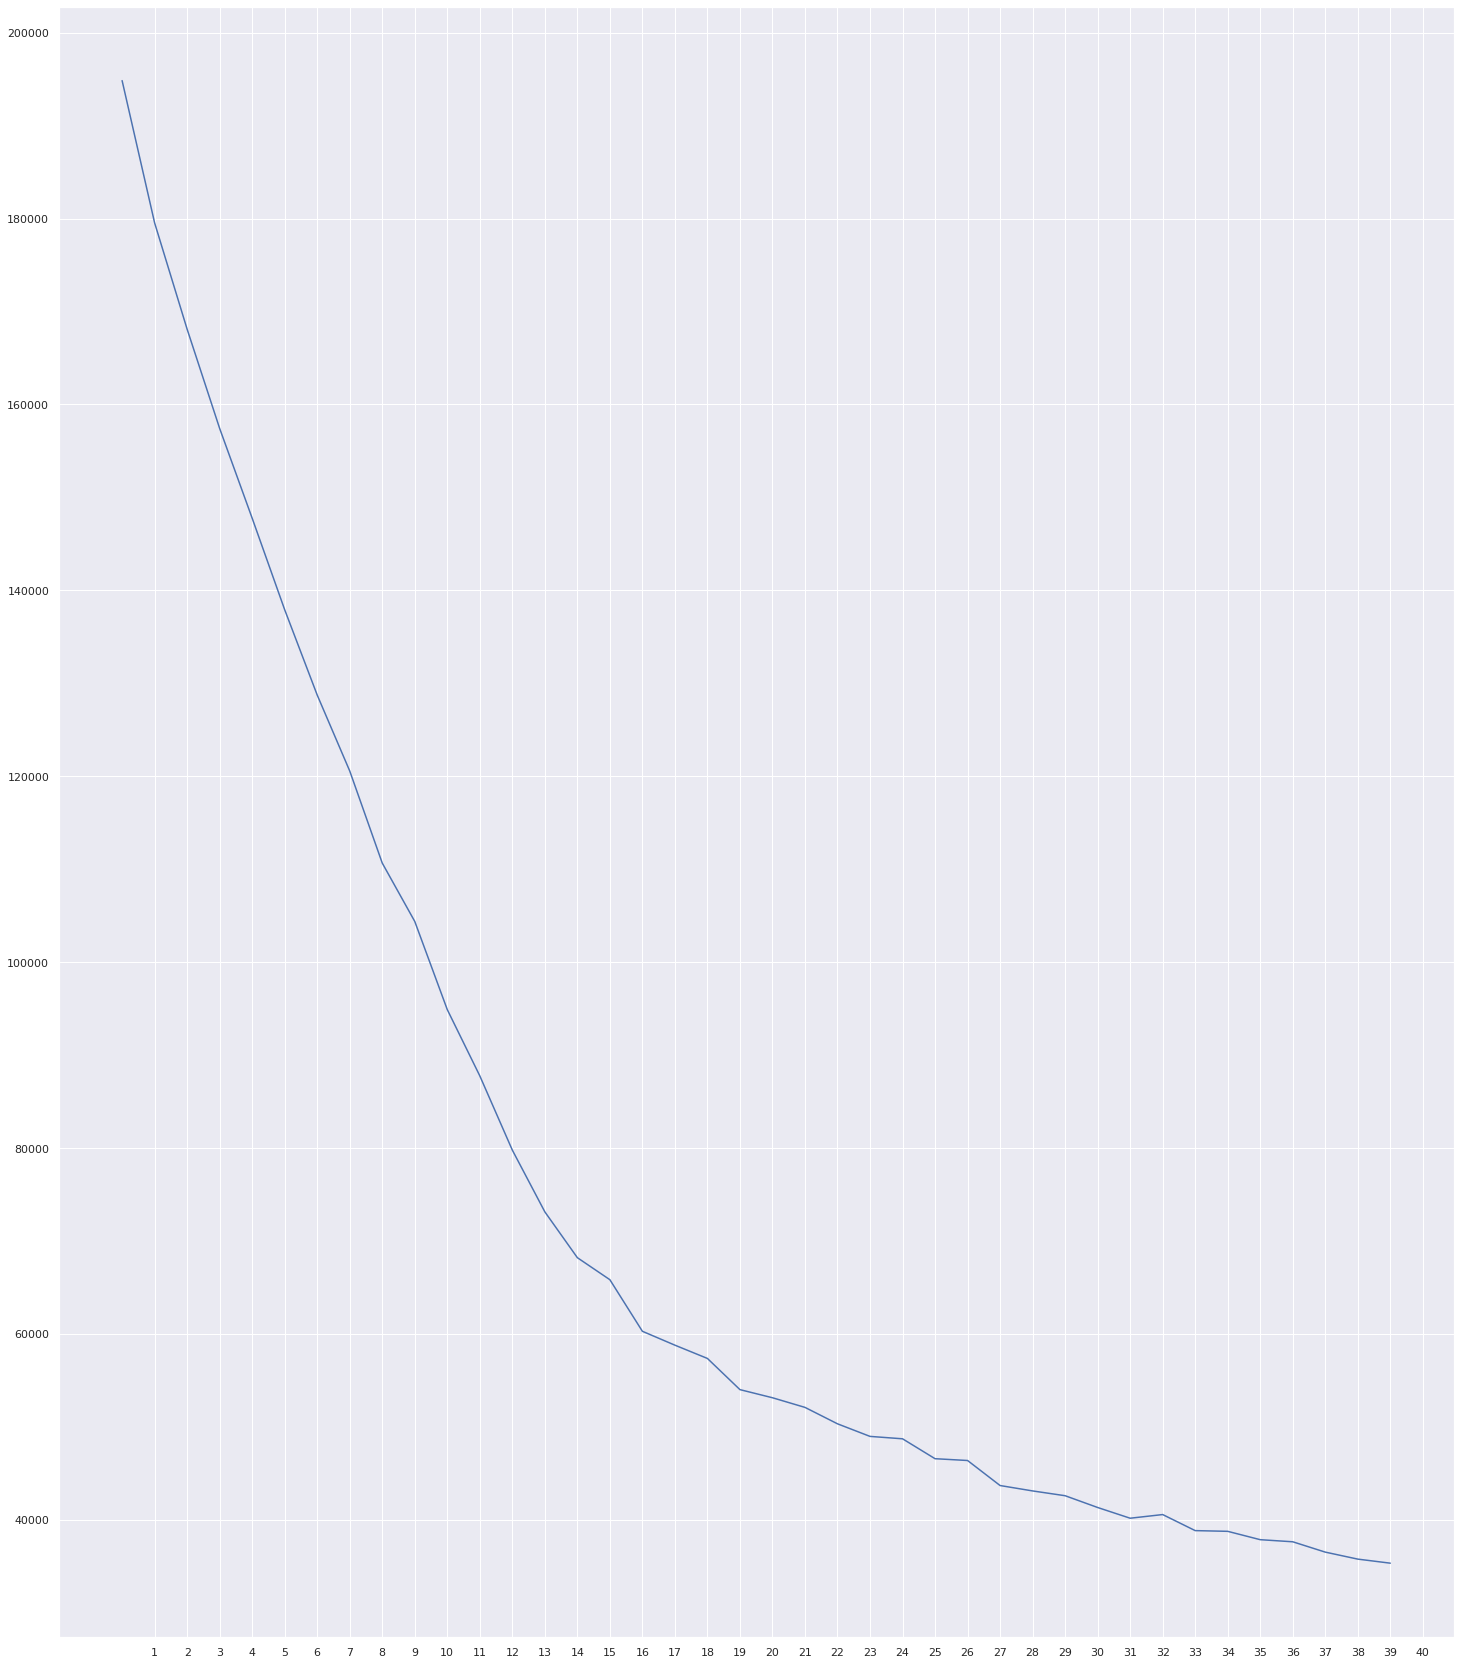

In [34]:
resultado.inertia.plot(xticks=resultado.grupos,figsize=(25, 30))

***Usamos o elbow method para achar o ponto certo da curva que indica o número de clusters elbow point=16.***

![imagem do elbow point](https://drive.google.com/uc?id=17vD6zrni8fS8cTyMqj5GzKgv1rm1B_5c)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd4800db240>,
      dtype=object)

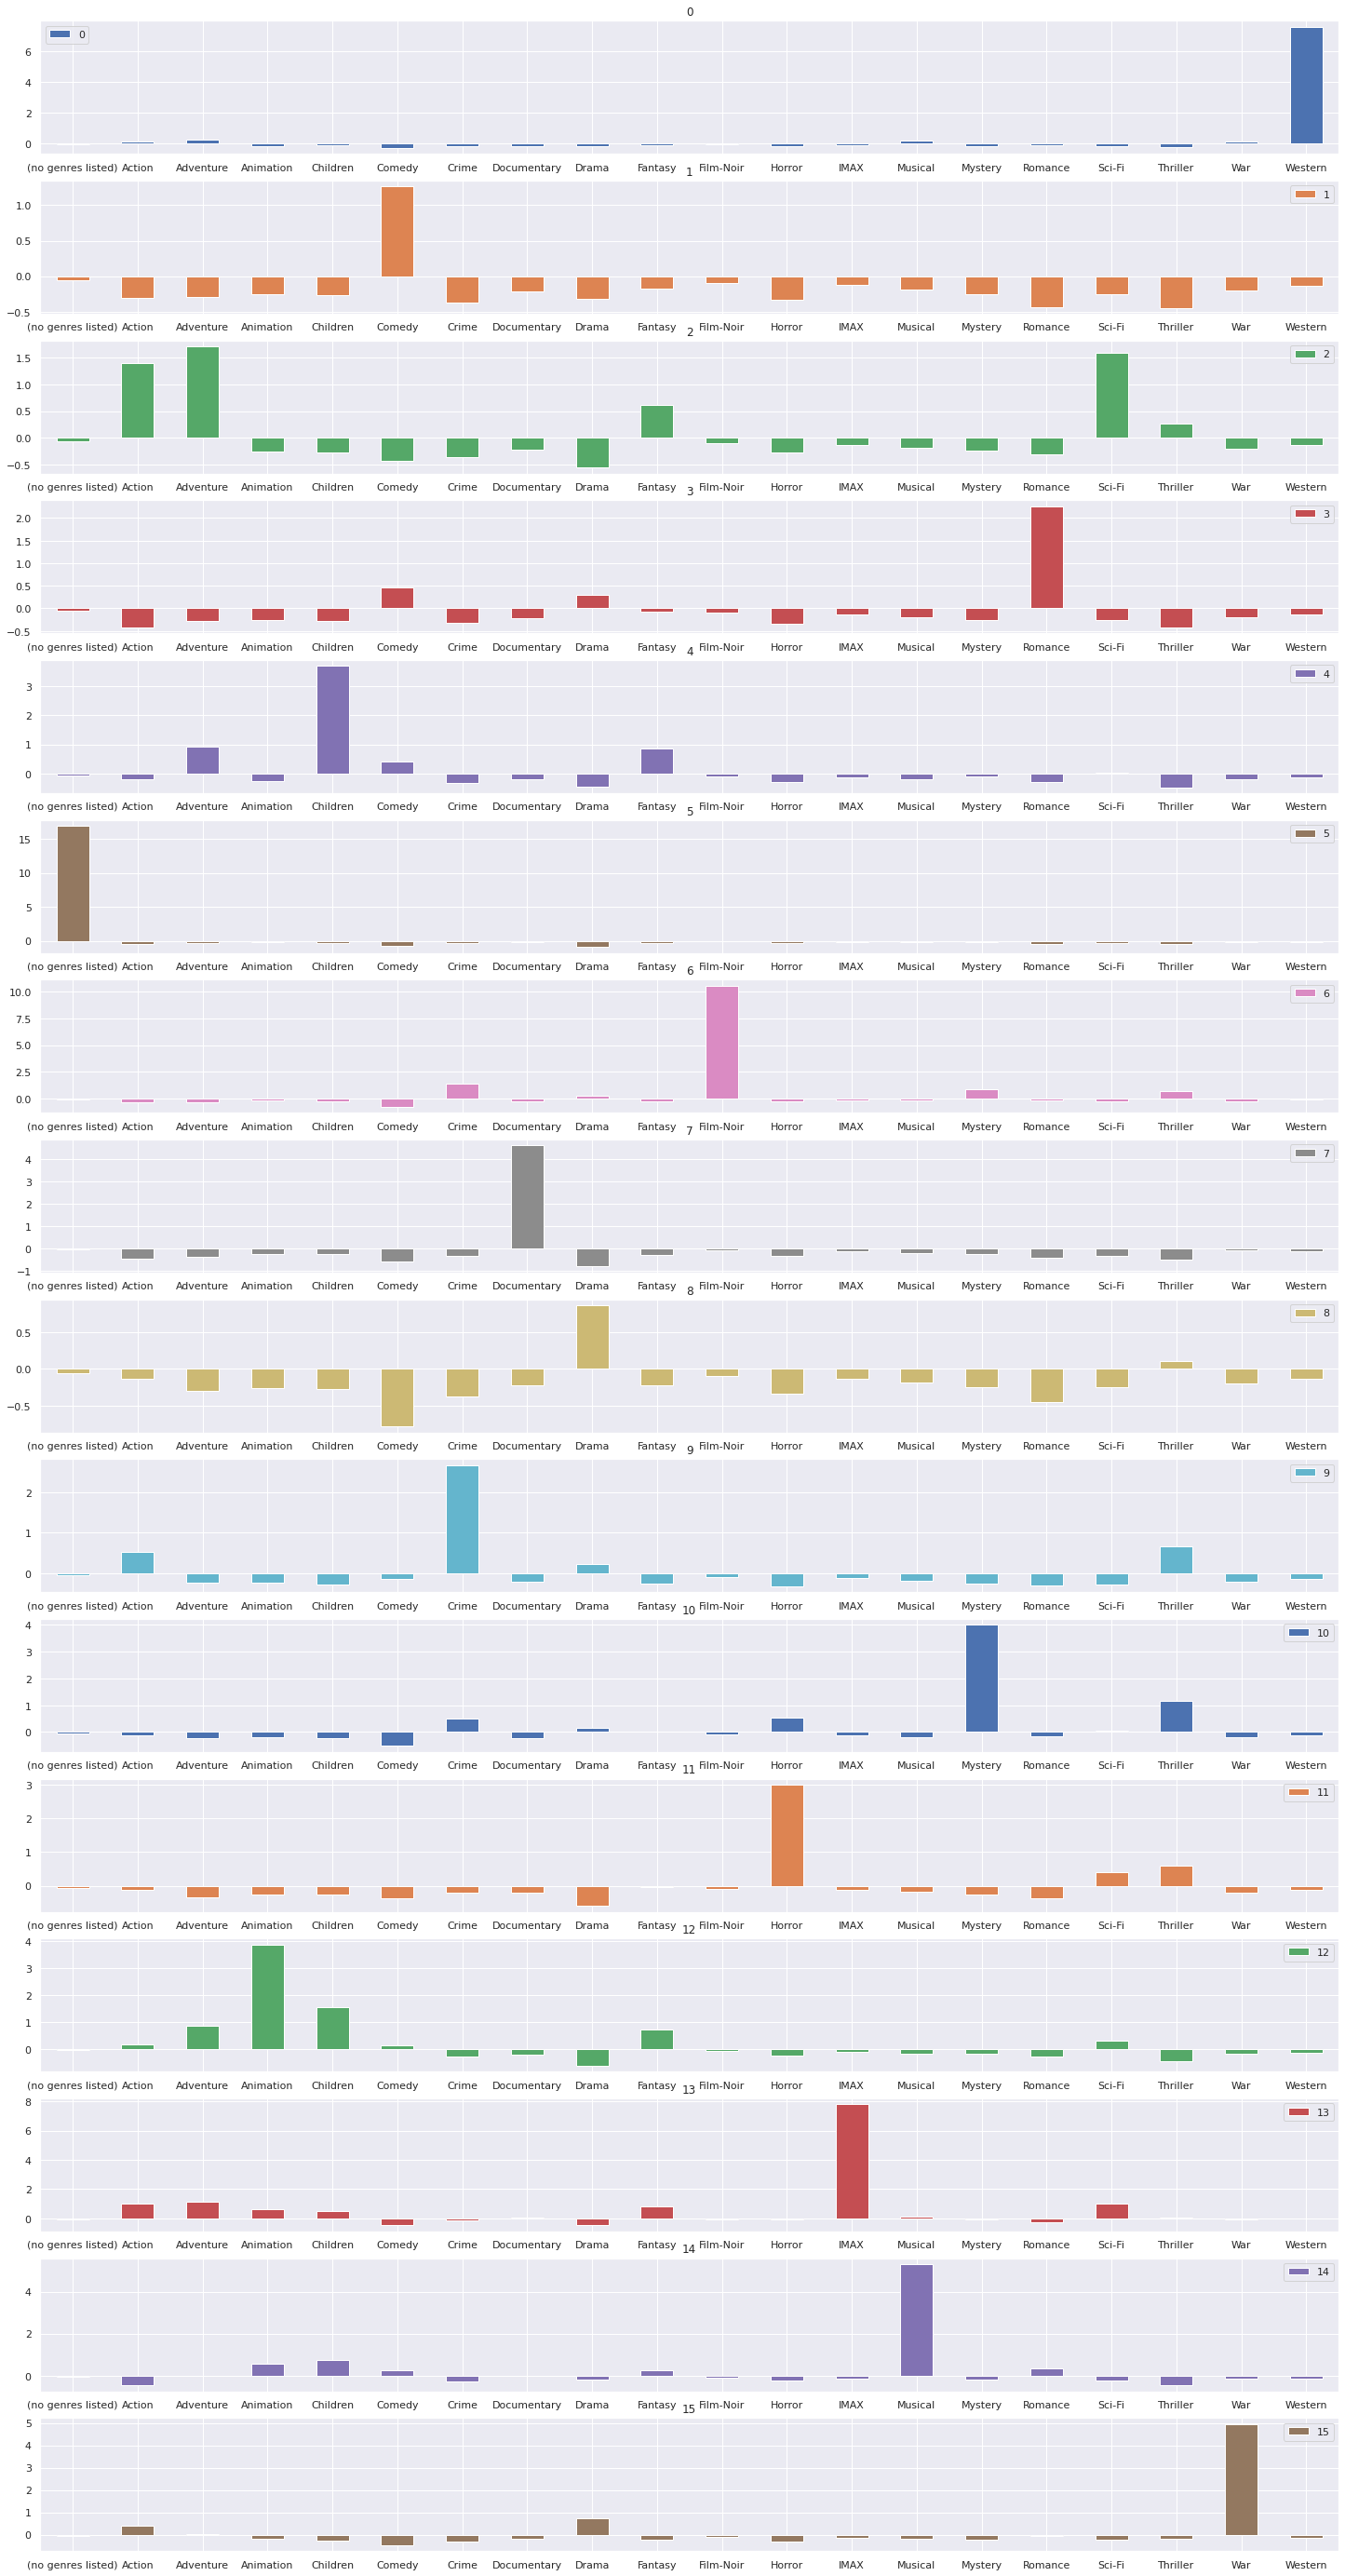

In [37]:
modelo = KM(n_clusters=16)
modelo.fit(generos_Escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)

grupos.transpose().plot.bar(subplots=True,
               figsize=(25, 50),
               sharex=False,
               rot=0)

In [39]:
grupo = 4

filtro = modelo.labels_ == grupo

dados_filmes[filtro].sample(10)

,filmesId,titulo,genero,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
771,1013,"Parent Trap, The (1961)",Children|Comedy|Romance,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1400,1919,Madeline (1998),Children|Comedy,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4339,6338,Daddy Day Care (2003),Children|Comedy,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
478,546,Super Mario Bros. (1993),Action|Adventure|Children|Comedy|Fantasy|Sci-Fi,0,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
9169,148775,Wizards of Waverly Place: The Movie (2009),Adventure|Children|Comedy|Drama|Fantasy|Sci-Fi,0,0,1,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0
6389,50601,Bridge to Terabithia (2007),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1521,2053,"Honey, I Blew Up the Kid (1992)",Children|Comedy|Sci-Fi,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9428,166203,Sapphire Blue (2014),Adventure|Children|Fantasy|Sci-Fi,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4269,6232,Born Free (1966),Adventure|Children|Drama,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4373,6405,Treasure Island (1950),Adventure|Children,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
